# This analysis addresses the research question: Can clustering on elevation, drainage density, storm drain proximity, and rainfall intensity per year reveal distinct urban flood risk typologies, such as low-lying, sparse-drainage, and high-rainfall areas?

# Import Libraries & Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# Plot setting
sns.set(style='whitegrid', palette='muted', font_scale=1.1)

In [3]:
# Import Urban Flood Risk data
path = "/Users/charlottelin/Documents/Achievement 6 Urban Flood Risk"
file_path = os.path.join(path, '02 Data', 'Prepared Data', 'urban_pluvial_flood_risk_clean2.csv')
df = pd.read_csv(file_path)

In [4]:
%matplotlib inline

In [5]:
# Check import
df.head()

,segment_id,city_name,admin_ward,latitude,longitude,catchment_id,elevation_m,dem_source,land_use,soil_group,drainage_density_km_per_km2,storm_drain_proximity_m,storm_drain_type,rainfall_source,historical_rainfall_intensity_mm_hr,return_period_years,risk_labels,rainfall_intensity_per_year
0,SEG-00001,"Colombo, Sri Lanka",Borough East,6.920633,79.912600,CAT-136,9.17,Copernicus_EEA-10_v5,Institutional,B,4.27,160.500000,CurbInlet,ERA5,39.4,50,monitor,0.788
1,SEG-00002,"Chennai, India",Ward D,13.076487,80.281774,CAT-049,-2.19,Copernicus_EEA-10_v5,Residential,D,7.54,105.316404,OpenChannel,ERA5,56.8,25,ponding_hotspot|low_lying|event_2025-05-02,2.272
2,SEG-00003,"Ahmedabad, India",Sector 12,23.019473,72.638578,CAT-023,30.88,SRTM_3arc,Industrial,B,11.00,152.500000,OpenChannel,IMD,16.3,5,monitor,3.260
3,SEG-00004,"Hong Kong, China",Sector 14,22.302602,114.078673,CAT-168,24.28,SRTM_3arc,Residential,B,7.32,37.000000,Manhole,ERA5,77.0,10,monitor,7.700
4,SEG-00005,"Durban, South Africa",Sector 5,-29.887602,30.911008,CAT-171,35.70,SRTM_3arc,Industrial,C,4.50,292.400000,OpenChannel,ERA5,20.8,5,monitor,4.160


# The Elbow Technique

In [6]:
# Select numerical variables for clustering
features = ['elevation_m', 'drainage_density_km_per_km2', 'storm_drain_proximity_m', 'rainfall_intensity_per_year']
X = df[features].copy()

In [7]:
# Standardize the features before running K-Means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Define range of potential clusters
inertia = []
K = range(1, 11)

In [9]:
# Define K-means clusters in the range assigned above
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

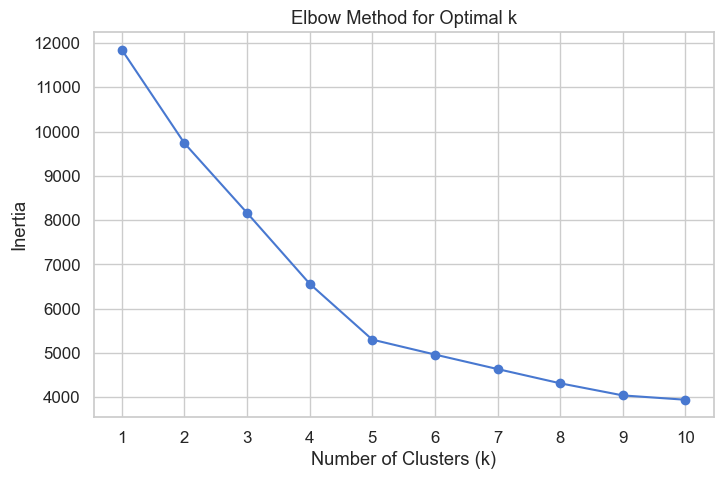

In [10]:
# Plot the elbow curve
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(K)

# Export the elbow graph
output_path = "/Users/charlottelin/Documents/Achievement 6 Urban Flood Risk/04 Analysis/Visualizations/elbow_method.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()

### Observation: 
The elbow plot shows a visible inflection around k = 4, where inertia reduction starts to slow substantially. While k = 5 continues to lower inertia slightly, the improvement is modest compared to previous steps. Therefore, <b>k = 4</b> is selected as the optimal number of clusters for interpretability and simplicity, though k = 5 may be tested in future iterations to examine whether additional sub-typologies of flood risk emerge.

# K-means Clustering

In [11]:
# Set k number
k_optimal = 4

In [12]:
# Run k-means clustering
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)
print("\nCluster label counts:")
print(df['cluster'].value_counts())


Cluster label counts:
cluster
3    1116
2    1061
0     405
1     380
Name: count, dtype: int64


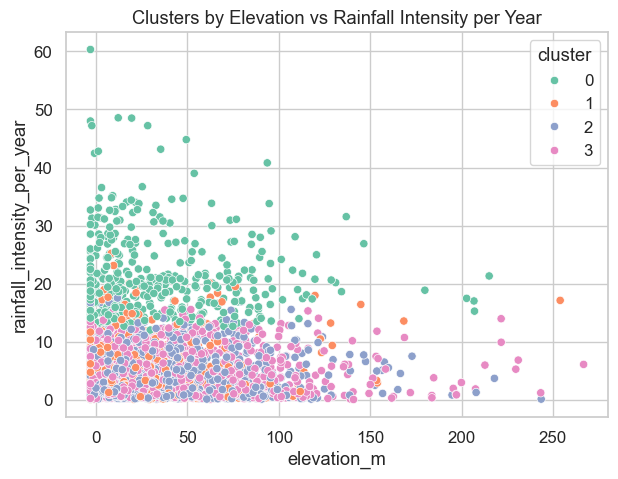

In [13]:
# Visualize clusters of elevation & rainfall intensity per year
plt.figure(figsize=(7,5))
sns.scatterplot(x='elevation_m', y='rainfall_intensity_per_year', 
                hue='cluster', palette='Set2', data=df)
plt.title('Clusters by Elevation vs Rainfall Intensity per Year')

# Export the elbow graph
output_path = "/Users/charlottelin/Documents/Achievement 6 Urban Flood Risk/04 Analysis/Visualizations/elevation & rainfall clusters.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()

### Observation:
The clusters show that higher rainfall intensity generally occurs at lower elevations, with Cluster 0 (green) representing low-lying, high-rainfall areas most exposed to flood risk. Other clusters overlap but trend toward lower rainfall and higher elevation, suggesting reduced hydrologic pressure.

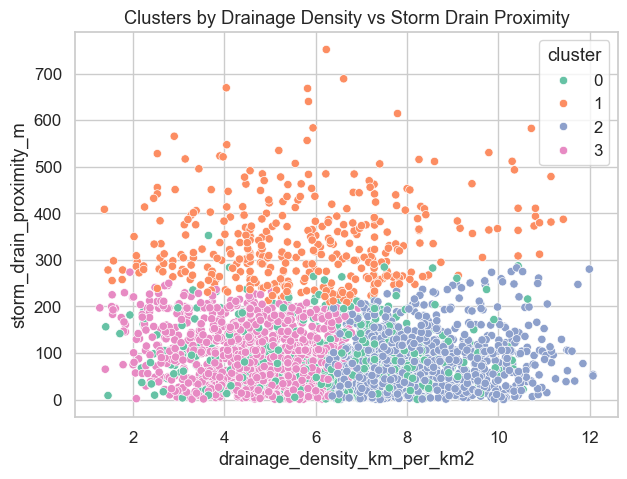

In [14]:
# Visualize clusters of drainage density & storm drain proximity
plt.figure(figsize=(7,5))
sns.scatterplot(x='drainage_density_km_per_km2', y='storm_drain_proximity_m', 
                hue='cluster', palette='Set2', data=df)
plt.title('Clusters by Drainage Density vs Storm Drain Proximity')

# Export the elbow graph
output_path = "/Users/charlottelin/Documents/Achievement 6 Urban Flood Risk/04 Analysis/Visualizations/drainage & drain proximity cluster.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()

### Observation:
Cluster 1 (orange) stands out with large storm drain spacing and low drainage density, indicative of sparse infrastructure and higher runoff vulnerability. Clusters 2 and 3 (pink, blue) exhibit denser drainage and closer storm drains, typical of well-serviced urban cores.

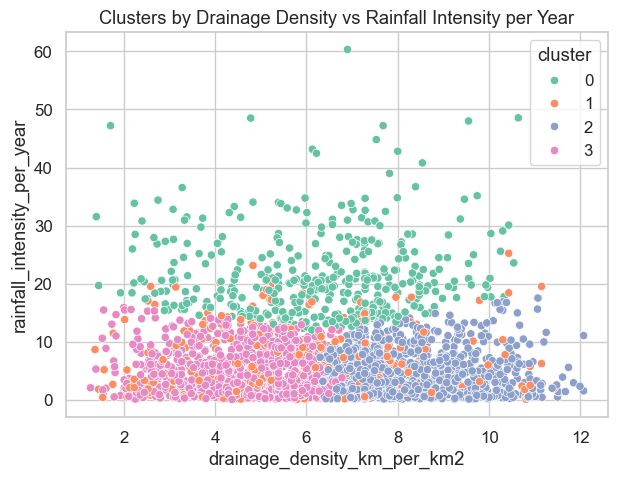

In [15]:
# Visualize clusters of drainage density and rainfall intensity per year
plt.figure(figsize=(7,5))
sns.scatterplot(x='drainage_density_km_per_km2', y='rainfall_intensity_per_year',
                hue='cluster', palette='Set2', data=df)
plt.title('Clusters by Drainage Density vs Rainfall Intensity per Year')

# Export the elbow graph
output_path = "/Users/charlottelin/Documents/Achievement 6 Urban Flood Risk/04 Analysis/Visualizations/drainage & rainfall cluster.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()

### Observation:
This view bridges infrastructure and climatic exposure. Cluster 0 again shows high rainfall despite moderate drainage density, while Clusters 2 and 3 cluster around lower rainfall and higher drainage density, suggesting infrastructure mitigates climatic risk.

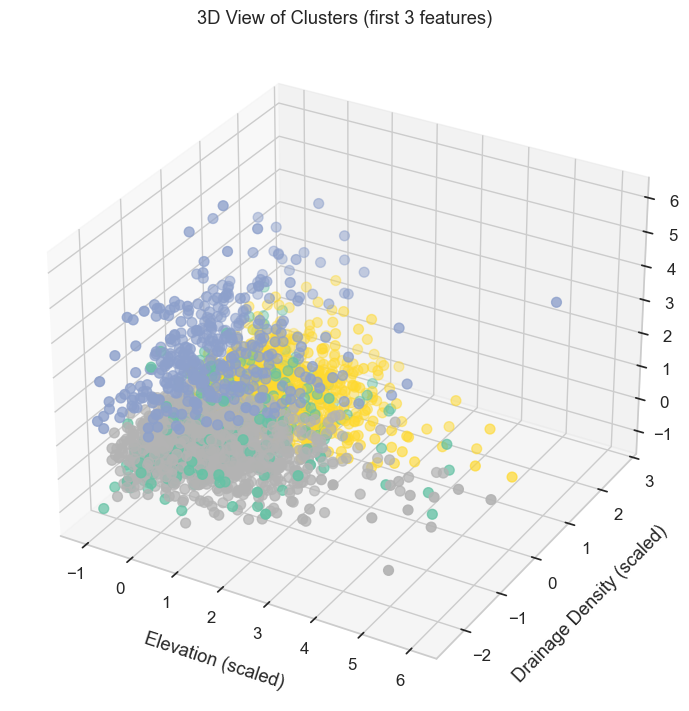

In [16]:
# Test 3D visualization
from mpl_toolkits.mplot3d import Axes3D

# Option A: Constrained layout + bigger figure
fig = plt.figure(figsize=(9,7), constrained_layout=True)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_scaled[:,0], X_scaled[:,1], X_scaled[:,2],
           c=df['cluster'], cmap='Set2', s=50)

ax.set_xlabel('Elevation (scaled)', labelpad=12)
ax.set_ylabel('Drainage Density (scaled)', labelpad=12)
ax.set_zlabel('Storm Drain Proximity (scaled)', labelpad=18)
ax.set_title('3D View of Clusters (first 3 features)')

# Export the elbow graph
output_path = "/Users/charlottelin/Documents/Achievement 6 Urban Flood Risk/04 Analysis/Visualizations/3D clusters.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()

### Observation:
The 3D plot confirms partial separation across elevation and infrastructure variables. Cluster groupings are evident but continuous, which reflects natural transitions between low-lying, infrastructure-limited zones and high-elevation, well-drained uplands.

# Descriptive Statistics

In [17]:
# Define columns for descriptive stats analysis
num_cols = ['elevation_m', 'drainage_density_km_per_km2',
            'storm_drain_proximity_m', 'rainfall_intensity_per_year']

In [18]:
# Run core stats
cluster_size = df['cluster'].value_counts().rename('n')
cluster_mean = df.groupby('cluster')[num_cols].mean().round(2)
cluster_std  = df.groupby('cluster')[num_cols].std().round(2)
cluster_med  = df.groupby('cluster')[num_cols].median().round(2)

In [19]:
# Combine into one table (mean ± std, plus median)
summary = cluster_mean.astype(str) + " ± " + cluster_std.astype(str)
summary.columns = [c + ' (mean±sd)' for c in summary.columns]
for c in num_cols:
    summary[c + ' (median)'] = cluster_med[c]
summary = summary.merge(cluster_size, left_index=True, right_index=True)
summary = summary.sort_values(by='elevation_m (median)')

display(summary)

,elevation_m (mean±sd),drainage_density_km_per_km2 (mean±sd),storm_drain_proximity_m (mean±sd),rainfall_intensity_per_year (mean±sd),elevation_m (median),drainage_density_km_per_km2 (median),storm_drain_proximity_m (median),rainfall_intensity_per_year (median),n
cluster,,,,,,,,,
1,32.36 ± 34.16,5.71 ± 2.02,336.26 ± 91.89,5.67 ± 4.99,21.26,5.58,312.95,4.31,380
2,35.43 ± 35.59,8.22 ± 1.25,84.38 ± 55.57,4.27 ± 3.57,23.85,7.90,80.10,3.24,1061
0,36.03 ± 37.99,6.23 ± 1.92,95.4 ± 64.61,21.25 ± 7.22,24.57,6.41,86.00,19.65,405
3,42.0 ± 40.95,4.68 ± 1.17,97.31 ± 58.72,4.56 ± 3.64,31.26,4.86,96.25,3.53,1116


### The descriptive results confirm four distinct flood-risk typologies emerging from the data:

- Cluster 1 (n = 380) – Lowest elevation and high storm-drain spacing (mean ≈ 336 m) despite moderate drainage density. Combined with above-average rainfall, this group likely represents low-lying areas with sparse drainage coverage and elevated flood exposure.
- Cluster 2 (n = 1061) – Moderate elevation, highest drainage density and shortest storm-drain proximity (~84 m). Rainfall is relatively low. This typifies well-drained urban cores with robust infrastructure and low hydrologic stress.
- Cluster 0 (n = 405) – Moderate elevation and drainage density but very high rainfall intensity (mean ≈ 21 mm/yr), marking rain-intense zones where even adequate drainage may be strained.
- Cluster 3 (n = 1116) – Highest elevation yet lowest drainage density. Despite lower rainfall, limited infrastructure may leave slopes vulnerable to runoff concentration, an upland or peri-urban typology with potential erosion or drainage lag issues.

### Summary:
Elevation and rainfall jointly define hydro-climatic exposure, while drainage density and storm-drain proximity capture infrastructure resilience. Together, these variables delineate four functionally distinct urban flood-risk regimes ranging from <b>low-lying high-rainfall floodplains to infrastructure-rich uplands</b>.

# Research Question & Next Steps

### Research question:
The results affirm the research question — clustering on elevation, drainage density, storm-drain proximity, and rainfall intensity per year can indeed reveal distinct flood-risk typologies.

- Low-lying, high-rainfall clusters capture areas most exposed to pluvial flooding.
- Sparse-drainage clusters identify infrastructure-limited neighborhoods where runoff management is insufficient.
- Well-drained, high-elevation clusters mark resilient zones suitable for urban growth or as benchmarks for infrastructure performance.

The analysis demonstrates that unsupervised learning can meaningfully segment complex urban environments into interpretable flood-risk regimes. These results establish a foundation for <b>data-driven resilience planning, targeted infrastructure investment, and future modeling of flood vulnerability</b> across diverse urban contexts.

### Next Analytical Steps:

- Spatial Integration: Map the cluster results back onto geographic coordinates to visualize the spatial distribution of each flood-risk typology across cities and land uses.
- Validation & Labeling: Compare clusters against historical flood records, land-use categories, or known flood-prone zones to validate model credibility.
- Predictive Modeling: Use the cluster labels as a new categorical feature in subsequent supervised models (e.g., predicting flood frequency or economic loss).
- Infrastructure Prioritization: Identify areas where infrastructure conditions (e.g., low drainage density, wide storm-drain spacing) diverge from climatic exposure, which will targeted upgrades.
- Scenario Analysis: Re-run clustering under projected rainfall or urbanization scenarios to assess how typologies shift under future climate conditions.

# Export Clustered Dataset

In [20]:
# Define export path
export_path = "/Users/charlottelin/Documents/Achievement 6 Urban Flood Risk/02 Data/Prepared Data"

# Create the output file name
output_file = os.path.join(export_path, "urban_flood_clustered.csv")

# Export the DataFrame with cluster labels
df.to_csv(output_file, index=False)

print(f"✅ Clustered dataset successfully exported to: {output_file}")
print("Columns exported:", df.columns.tolist())

✅ Clustered dataset successfully exported to: /Users/charlottelin/Documents/Achievement 6 Urban Flood Risk/02 Data/Prepared Data/urban_flood_clustered.csv
Columns exported: ['segment_id', 'city_name', 'admin_ward', 'latitude', 'longitude', 'catchment_id', 'elevation_m', 'dem_source', 'land_use', 'soil_group', 'drainage_density_km_per_km2', 'storm_drain_proximity_m', 'storm_drain_type', 'rainfall_source', 'historical_rainfall_intensity_mm_hr', 'return_period_years', 'risk_labels', 'rainfall_intensity_per_year', 'cluster']
